>Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from sklearn.model_selection import train_test_split
%config IPCompleter.greedy=True
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

>Loading data

In [82]:
df1 = pd.read_excel('C:/Users/HP/Desktop/2018_2019_data.xlsx')

In [83]:
df2 = pd.read_excel('C:/Users/HP/Desktop/attrited_2018_master.xlsx')

In [84]:
df3 = pd.read_excel('C:/Users/HP/Desktop/attrited_2019_master.xlsx')

# Data Transformation and Cleaning

In [85]:
#combining the related source data
df4 = pd.concat([df2,df3])
df4

,Emplid,Age,Gender,Married,Education Level,Education Specialisation,Department / BU,Designation,Job Level,No of Days Present,...,Time in months since manager change,Time in months in current role,shDurationHrs,ti_auxtime,No of Schedule for Work,Total No of Schedule,LAST_DATE_WORKED,ACTION_REASON,Employment_Status,Month
0,EMP100167,36.0,MALE,Unknown,A-Not Indicated,NaN,Deskside Support,Lead-Help Desk,3,26.0,...,29.0,74.0,9.0,NaN,27.0,47.0,NaT,NaN,NaN,2018-04-01
1,EMP100201,35.0,FEMALE,Unknown,A-Not Indicated,NaN,Service Delivery Operations,Lead-IT Helpdesk,3,64.0,...,NaN,NaN,9.0,NaN,64.0,90.0,NaT,NaN,NaN,2018-04-01
2,EMP100511,43.0,MALE,Unknown,G-Bachelor's Level Degree,NaN,SQMS Common,Lead-SQMS,3,57.0,...,18.0,25.0,9.0,NaN,59.0,91.0,NaT,NaN,NaN,2018-04-01
3,EMP100562,33.0,MALE,Unknown,D-Some College,NaN,Service Delivery Operations,Sr. Assoc-CS Phone,2,60.0,...,NaN,NaN,9.0,NaN,64.0,91.0,NaT,NaN,NaN,2018-04-01
4,EMP100611,57.0,MALE,Married,A-Not Indicated,NaN,Treasury,VP - Treasury,8,61.0,...,30.0,68.0,9.0,NaN,61.0,91.0,NaT,NaN,NaN,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115523,EMPPH020622,40.0,MALE,Married,G-Bachelor's Level Degree,NaN,HR - Geos Local,Sr Dir-Geo HR,6,58.0,...,27.0,27.0,9.0,NaN,62.0,92.0,NaT,NaN,NaN,2019-01-01
115524,EMPPH033116,39.0,MALE,Single,G-Bachelor's Level Degree,NaN,OE Global Common,Assoc Prin-Digitization,5,53.0,...,NaN,79.0,9.0,NaN,58.0,93.0,NaT,NaN,NaN,2019-01-01
115525,EMPPH035907,35.0,MALE,Single,G-Bachelor's Level Degree,NaN,Service Delivery SHS,Sr Dir-Healthcare,6,56.0,...,NaN,30.0,0.0,NaN,NaN,6.0,NaT,NaN,NaN,2019-01-01
115526,EMPPH048214,36.0,MALE,Single,G-Bachelor's Level Degree,NaN,Service Delivery Operations,Manager-Account Management,5,55.0,...,NaN,15.0,9.0,NaN,63.0,93.0,NaT,NaN,NaN,2019-01-01


In [86]:
df1

,Month,Emplid,No of Days Present,No of Days Absent,Job Level,Time in months since manager change,Employment_Status,KRA 1,KRA 2,KRA 3,KRA 4,KRA 5,KRA 6,KRA_3months,KRA_6months,KRA_12months
0,2019-04-01,EMP100167,58,5,4,41,0,5.0,4.55,4.55,4.55,5.0,5.0,4.700000,4.775000,4.804167
1,2019-04-01,EMP100511,53,6,3,30,0,4.0,4.00,4.00,4.00,4.0,4.0,4.000000,4.000000,4.083333
2,2019-04-01,EMP100562,58,0,3,9,0,5.0,5.00,5.00,5.00,5.0,5.0,5.000000,5.000000,5.000000
3,2019-04-01,EMP100611,63,0,8,42,0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000
4,2019-04-01,EMP100791,63,0,3,0,0,4.0,5.00,4.00,4.00,4.0,5.0,4.333333,4.333333,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322826,2018-12-01,EMPPH020622,53,1,6,26,0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000
322827,2018-12-01,EMPPH033116,56,2,5,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000
322828,2018-12-01,EMPPH035907,57,0,6,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000
322829,2018-12-01,EMPPH048214,56,6,5,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000


>Dropping duplicate columns before merge

In [87]:
df4=df4.drop(['No of Days Present','No of Days Absent','Time in months since manager change','Employment_Status'], axis = 1)
df1=df1.drop(['Job Level'],axis =1)

In [88]:
df5=pd.merge(df4,df1,on=['Emplid','Month'])
df5

,Emplid,Age,Gender,Married,Education Level,Education Specialisation,Department / BU,Designation,Job Level,Time since last salary hike,...,Employment_Status,KRA 1,KRA 2,KRA 3,KRA 4,KRA 5,KRA 6,KRA_3months,KRA_6months,KRA_12months
0,EMP100167,36.0,MALE,Unknown,A-Not Indicated,NaN,Deskside Support,Lead-Help Desk,3,NaN,...,0,4.55,4.55,5.0,5.0,5.0,5.0,4.850000,4.850000,4.820833
1,EMP100201,35.0,FEMALE,Unknown,A-Not Indicated,NaN,Service Delivery Operations,Lead-IT Helpdesk,3,NaN,...,0,4.00,4.00,5.0,4.0,5.0,4.0,4.333333,4.333333,3.833333
2,EMP100511,43.0,MALE,Unknown,G-Bachelor's Level Degree,NaN,SQMS Common,Lead-SQMS,3,NaN,...,0,4.00,4.00,4.0,4.0,4.0,4.0,4.000000,4.000000,4.500000
3,EMP100562,33.0,MALE,Unknown,D-Some College,NaN,Service Delivery Operations,Sr. Assoc-CS Phone,2,NaN,...,0,5.00,5.00,4.0,5.0,5.0,5.0,4.833333,4.833333,4.916667
4,EMP100611,57.0,MALE,Married,A-Not Indicated,NaN,Treasury,VP - Treasury,8,NaN,...,0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322826,EMPPH020622,40.0,MALE,Married,G-Bachelor's Level Degree,NaN,HR - Geos Local,Sr Dir-Geo HR,6,NaN,...,0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
322827,EMPPH033116,39.0,MALE,Single,G-Bachelor's Level Degree,NaN,OE Global Common,Assoc Prin-Digitization,5,4.0,...,0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
322828,EMPPH035907,35.0,MALE,Single,G-Bachelor's Level Degree,NaN,Service Delivery SHS,Sr Dir-Healthcare,6,4.0,...,0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
322829,EMPPH048214,36.0,MALE,Single,G-Bachelor's Level Degree,NaN,Service Delivery Operations,Manager-Account Management,5,4.0,...,0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


>Checking missing values

In [89]:
df5.isna().sum()

Emplid                                      0
Age                                       156
Gender                                    101
Married                                     0
Education Level                         10431
Education Specialisation               322831
Department / BU                             0
Designation                                 0
Job Level                                   0
Time since last salary hike            226484
Time in months with company                 0
Time in months in current role          16044
shDurationHrs                            3974
ti_auxtime                             315442
No of Schedule for Work                  4980
Total No of Schedule                     2979
LAST_DATE_WORKED                       309953
ACTION_REASON                          309953
Month                                       0
No of Days Present                          0
No of Days Absent                           0
Time in months since manager chang

In [90]:
df5[df5['Employment_Status']==1].isna().sum()

Emplid                                     0
Age                                       11
Gender                                     2
Married                                    0
Education Level                           79
Education Specialisation               12878
Department / BU                            0
Designation                                0
Job Level                                  0
Time since last salary hike            10827
Time in months with company                0
Time in months in current role            43
shDurationHrs                            349
ti_auxtime                             12725
No of Schedule for Work                  408
Total No of Schedule                     310
LAST_DATE_WORKED                           0
ACTION_REASON                              0
Month                                      0
No of Days Present                         0
No of Days Absent                          0
Time in months since manager change        0
Employment

In [91]:
#dropping obviously useless columns and columns with too many missing values

df5 = df5.drop(['Emplid','Education Specialisation','LAST_DATE_WORKED','ACTION_REASON','ti_auxtime','Married','Time since last salary hike','Education Level'],axis = 1)


>Checking Missing Values After Dropping 

In [92]:
df5.isna().sum()

Age                                      156
Gender                                   101
Department / BU                            0
Designation                                0
Job Level                                  0
Time in months with company                0
Time in months in current role         16044
shDurationHrs                           3974
No of Schedule for Work                 4980
Total No of Schedule                    2979
Month                                      0
No of Days Present                         0
No of Days Absent                          0
Time in months since manager change        0
Employment_Status                          0
KRA 1                                      0
KRA 2                                      0
KRA 3                                      0
KRA 4                                      0
KRA 5                                      0
KRA 6                                      0
KRA_3months                                0
KRA_6month

In [93]:
#dealing with the rest of the missing values
df5['shDurationHrs'] = df5['shDurationHrs'].fillna(df5['shDurationHrs'].mode()[0])
df5['No of Schedule for Work'] = df5['No of Schedule for Work'].fillna(method = 'pad')
df5['Total No of Schedule'] = df5['Total No of Schedule'].fillna(method = 'pad')
a = df5['Age'].notna()
df5 = df5[a]
b = df5['Time in months in current role'].notna()
df5 = df5[b]
c = df5['Gender'].notna()
df5 = df5[c]

In [94]:
df5.isnull().sum()

Age                                    0
Gender                                 0
Department / BU                        0
Designation                            0
Job Level                              0
Time in months with company            0
Time in months in current role         0
shDurationHrs                          0
No of Schedule for Work                0
Total No of Schedule                   0
Month                                  0
No of Days Present                     0
No of Days Absent                      0
Time in months since manager change    0
Employment_Status                      0
KRA 1                                  0
KRA 2                                  0
KRA 3                                  0
KRA 4                                  0
KRA 5                                  0
KRA 6                                  0
KRA_3months                            0
KRA_6months                            0
KRA_12months                           0
dtype: int64

In [95]:
df5['Designation']=df5['Designation'].str.split('-',expand = True)

In [96]:
#correcting textual discrepancies in our feature columns
df5['Designation']=df5['Designation'].replace(to_replace ="Sr Assoc", 
                 value ="Sr. Assoc")
df5['Designation']=df5['Designation'].replace(to_replace ="Sr Prof", 
                 value ="Sr. Prof")
df5['Designation']=df5['Designation'].replace(to_replace ="Sr Prin", 
                 value ="Sr. Prin")
df5['Designation']=df5['Designation'].replace(to_replace ="VP ", 
                 value ="VP")

In [487]:
#dealing with categorical variables
df5['Designation']=df5['Designation'].astype('category')
df5['Department / BU']=df5['Department / BU'].astype('category')
df5['Gender']=df5['Gender'].astype('category')

In [488]:
#splitting data into training/test and validation data on basis of month
dfv = df5.loc[df5.Month == '2019-04-01']
df = df5.loc[df5.Month != '2019-04-01']

In [489]:
df = df.drop(['Month'],axis = 1)
dfv = dfv.drop(['Month'],axis = 1)
df.dtypes

Age                                     float64
Gender                                 category
Department / BU                        category
Designation                            category
Job Level                                 int64
Time in months with company               int64
Time in months in current role          float64
shDurationHrs                           float64
No of Schedule for Work                 float64
Total No of Schedule                    float64
No of Days Present                        int64
No of Days Absent                         int64
Time in months since manager change       int64
Employment_Status                         int64
KRA 1                                   float64
KRA 2                                   float64
KRA 3                                   float64
KRA 4                                   float64
KRA 5                                   float64
KRA 6                                   float64
KRA_3months                             

# Data Exploration

In [490]:
#Numerical data distribution

In [491]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

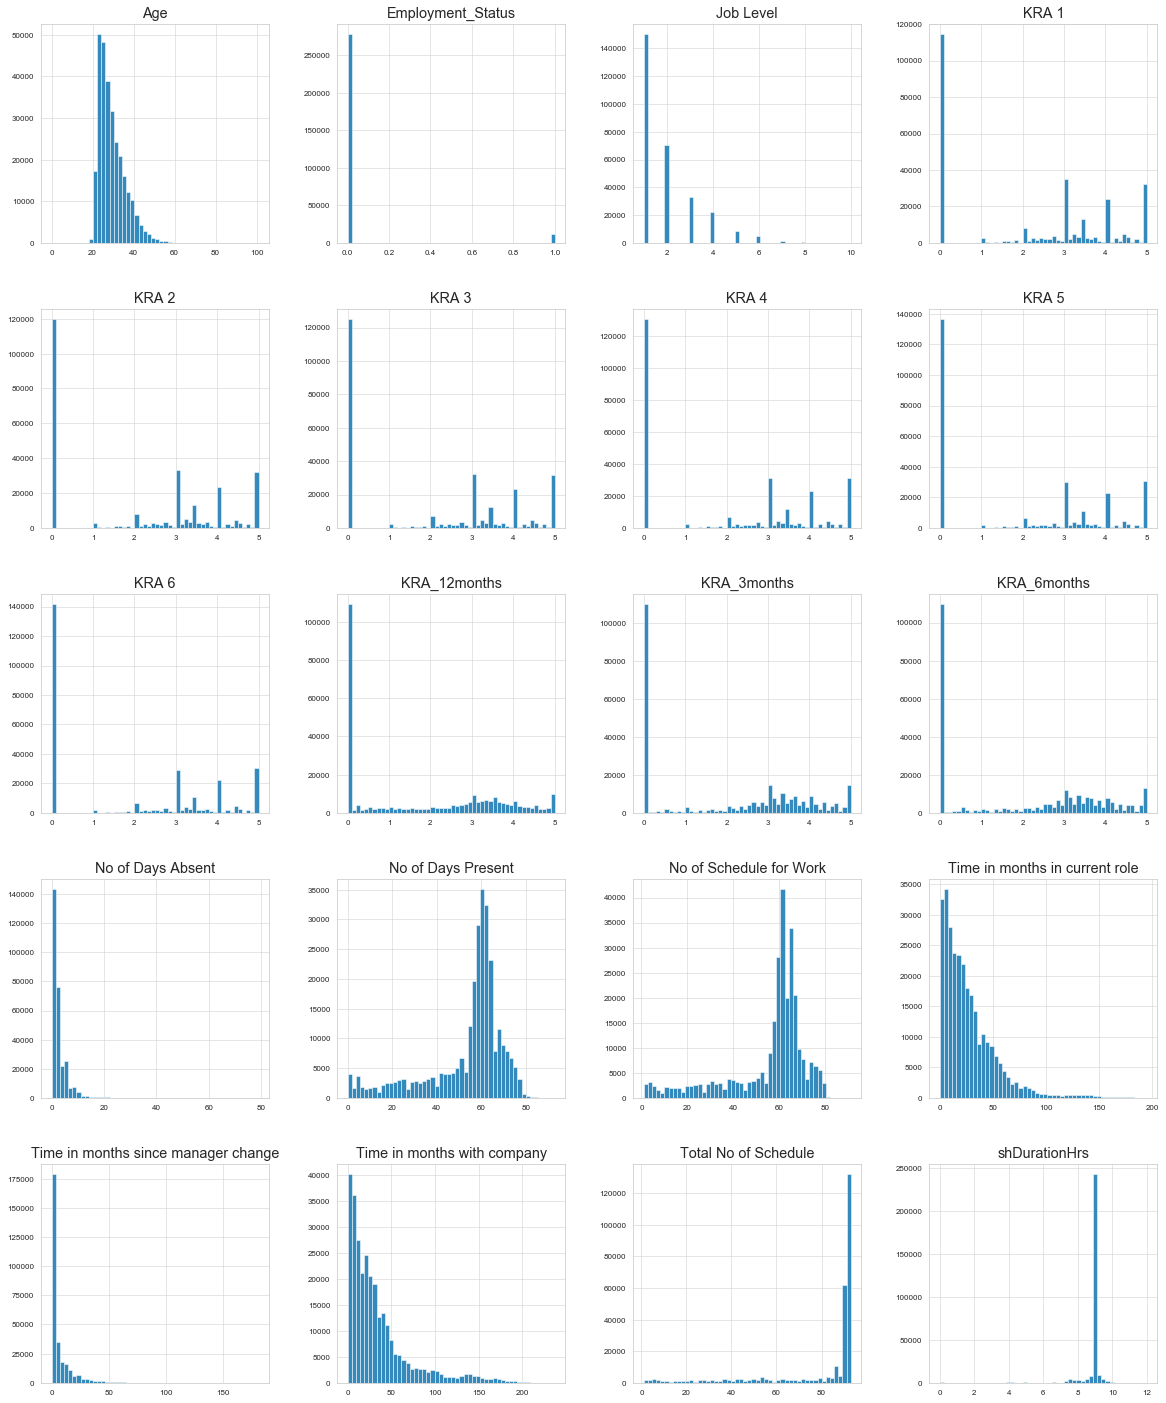

In [492]:
df_num.hist(figsize=(20, 25), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

- We can see that the the distribution for our target variable Employment Status is highly skewed.
- The time in months in current role and time in months with company share a very similar distribution.
- Similarly the KRA columns seem to be strongly correlated.
- The other distributions follow logically.

0    278297
1     12278
Name: Employment_Status, dtype: int64

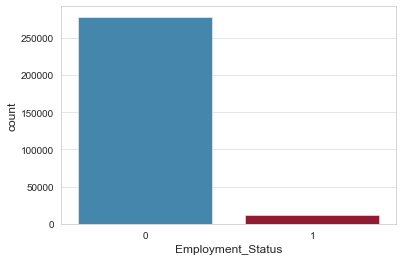

In [493]:
#checking out the target variable
sns.countplot(df['Employment_Status'])
df['Employment_Status'].value_counts()

To further investigate our data we'll need to undersample it in order to get a balanced distribution.

#### Undersampling the data


In [494]:
RSEED = 13 #setting random seed value for all further calculations

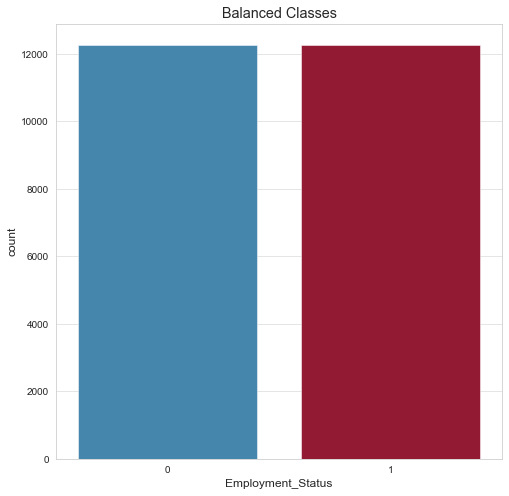

In [495]:
#undersampling
shuffled_df = df.sample(frac = 1, random_state  = RSEED)
attrited_df = shuffled_df.loc[shuffled_df['Employment_Status']==1]
non_attrited_df = shuffled_df.loc[shuffled_df['Employment_Status']==0].sample(n= 12278, random_state=RSEED)
normalized_df = pd.concat([attrited_df,non_attrited_df])
plt.figure(figsize=(8, 8))
sns.countplot('Employment_Status', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

We can now continue our data exploration

>Correlation Matrices are at the heart of our data exploration.

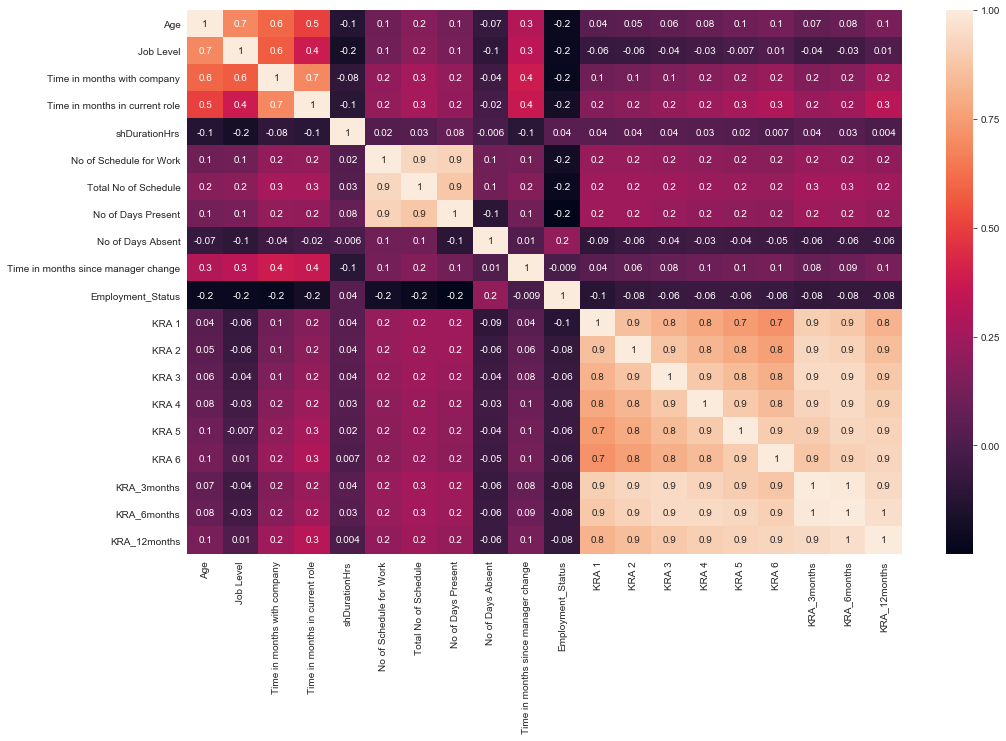

In [496]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(normalized_df.corr(), annot = True, fmt='.1g', ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

>Right away the correlation heatmap is giving us a lot of useful information.



* The variables *Age, Job Level , Time in months with the company and Time in months since manager* change are strongly correlated which also follows logically.

* *No. of schedule for work, Total no. of schedule and No. of days present* are also strongly positively correlated which makes sense.

* The KRA columns are all very strongly correlated to each other, confirming what we saw earlier in the histograms. We can do fine with KRA 1 and KRA_3months as they are the ones which show some slight divergence.

Now examining our taget variable Employment Status,

- Is *quite strongly* positively correlated to No. of days present. **This implies that absenteeism is a good indicator of whether an employee is going to leave a company or not.**

- *Age, Job Level, Time in months with company, Time in months in current role, Working hours, and No. of days present* are negatively correlated to attrition. **This means that attrition is happening more among younger employees, those at lower positions in the company, those who haven't been in the company for a long time, those who haven't been in the same role for a long time, those who have been putting in lesser working hours and those who were present on lesser no. of days**(direct consequence of absenteeism here).


In [497]:
#dropping the less useful KRA values
df = df.drop(['KRA 2','KRA 3','KRA 4','KRA 5','KRA 6','KRA_12months','KRA_6months'],axis = 1)
dfv = dfv.drop(['KRA 2','KRA 3','KRA 4','KRA 5','KRA 6','KRA_12months','KRA_6months'],axis = 1)

> We can now examine the categorical variables.

### Gender

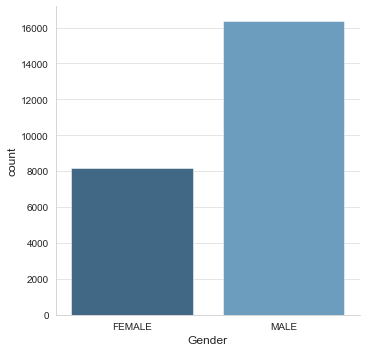

In [498]:
sns.catplot(x="Gender", kind="count", palette="Blues_d", data=normalized_df);

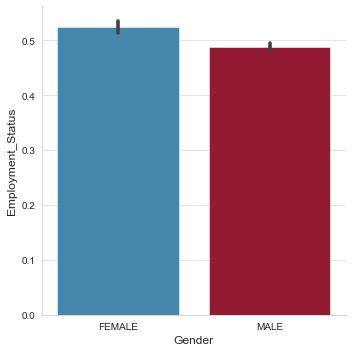

In [499]:
sns.catplot(x="Gender", y="Employment_Status", kind="bar", data=normalized_df);

We can see that the gender ratio in the company is skewed towards males. However attrition seems to be ever so slightly higher in case of females.

### Department

In [500]:
df['Department / BU'].nunique()

119

Out of the 119 unique departments, let's analyze the top 20 departments by employees.

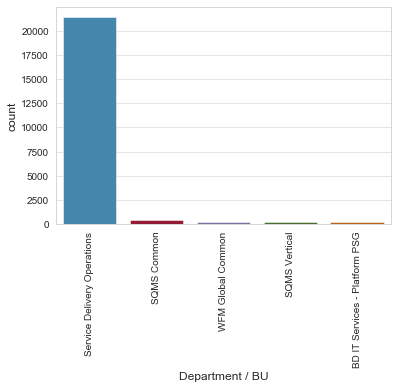

In [501]:
sns.countplot(normalized_df['Department / BU'],order=normalized_df['Department / BU'].value_counts().iloc[:5].index)
plt.xticks(rotation=90)
plt.show()

Most of the company employees are in the service delivery operations. Let's try excluding this to get a better picture about the other departments.

In our predictive model this feature is not going to be very useful at all considering the high skew it has.

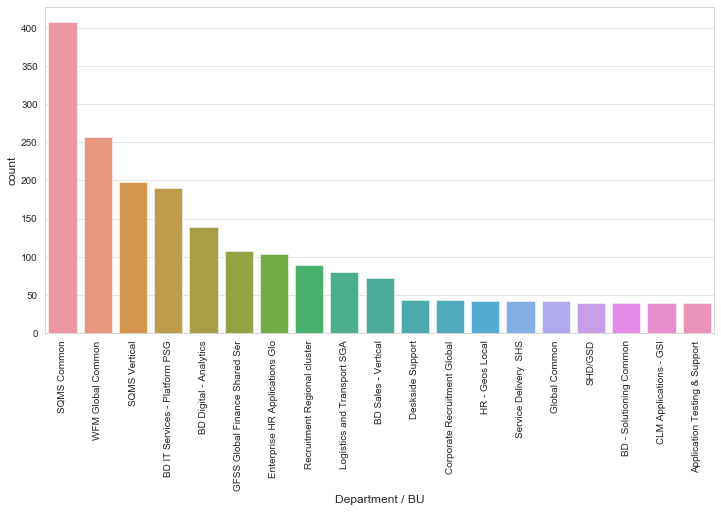

In [502]:
plt.figure(figsize = (12, 6))
sns.countplot(normalized_df['Department / BU'],order=normalized_df['Department / BU'].value_counts().iloc[1:20].index)
plt.xticks(rotation=90)
plt.show()

<Figure size 864x432 with 0 Axes>

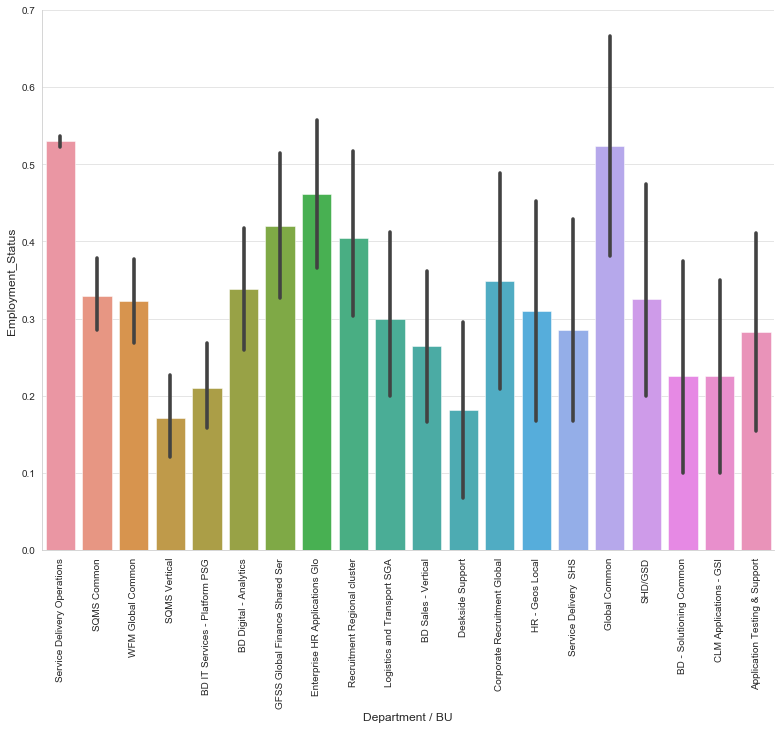

In [503]:
plt.figure(figsize = (12, 6))
sns.catplot(x='Department / BU', y="Employment_Status", kind="bar", data=normalized_df, order = normalized_df['Department / BU'].value_counts().iloc[:20].index,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

From this data it is clear that Enterprise HR Applications Global and *especially* Global Common are showing unusually high rate of attrition.

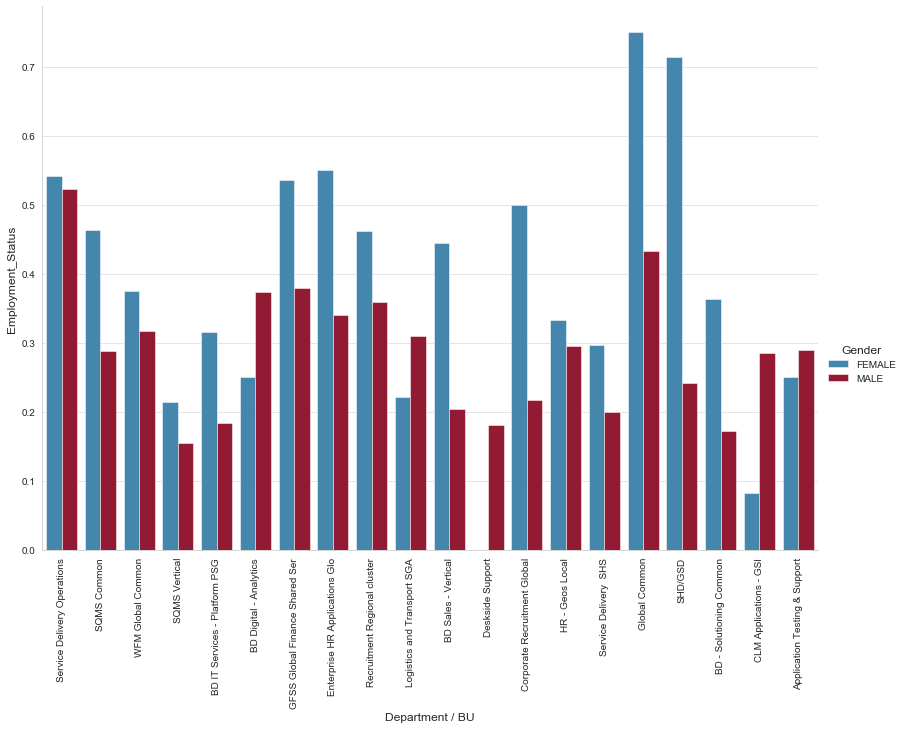

In [504]:
sns.catplot(x="Department / BU", y="Employment_Status", hue = 'Gender', kind="bar", data=normalized_df,order = normalized_df['Department / BU'].value_counts().iloc[:20].index,ci=None,height=8.27, aspect=11.7/8.27);
plt.xticks(rotation=90)
plt.show()

Relating this data with gender we can see that atrrition is quite high among females, again, in the **Global Common** department as well as SHD/GSD department.

### Designation

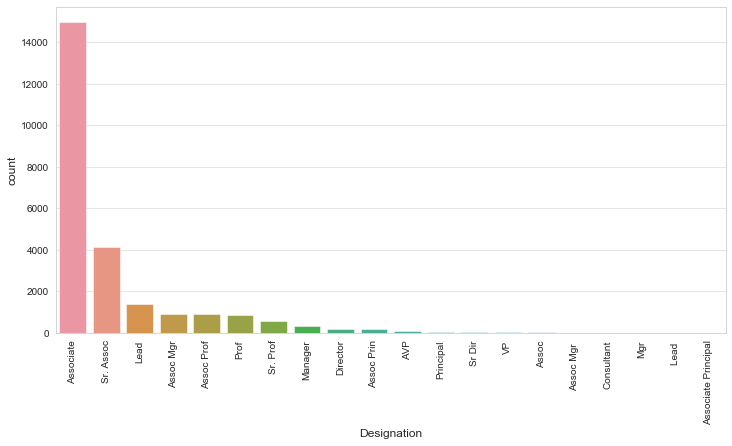

In [505]:
plt.figure(figsize = (12, 6))
sns.countplot(normalized_df['Designation'],order=normalized_df['Designation'].value_counts().iloc[0:20].index)
plt.xticks(rotation=90)
plt.show()

<Figure size 864x432 with 0 Axes>

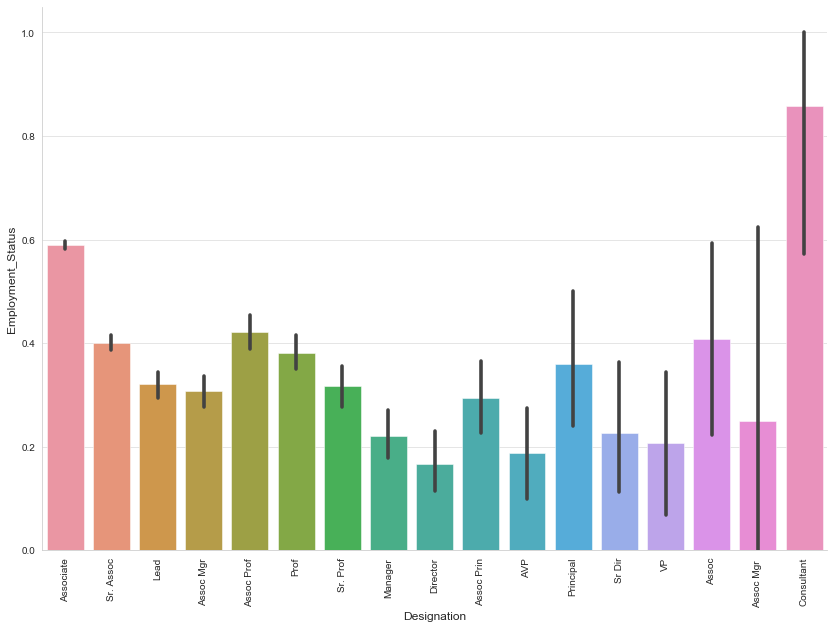

In [506]:
plt.figure(figsize = (12, 6))
sns.catplot(x='Designation', y="Employment_Status", kind="bar", data=normalized_df, order = normalized_df['Designation'].value_counts().iloc[:17].index,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

The attrition rate is very high among **Consultants, Associate Professors, Principals and other Associates.**

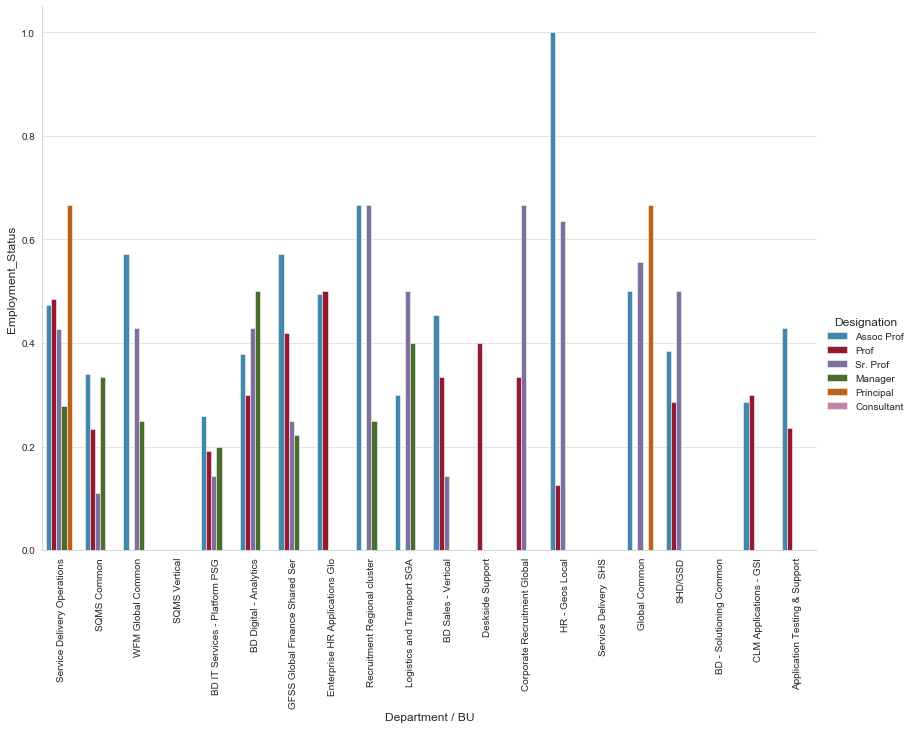

In [507]:
sns.catplot(x="Department / BU", y="Employment_Status", hue = 'Designation',hue_order =normalized_df['Designation'].value_counts().iloc[[4,5,6,7,11,16]].index, kind="bar", data=normalized_df,order = normalized_df['Department / BU'].value_counts().iloc[:20].index,ci=None,height=8.27, aspect=11.7/8.27);
plt.xticks(rotation=90)
plt.show()

**In Global Common, Principals is the designation which is attriting the most. Similarly in Service Delivery Operations.**

**Associate Professors have a high attrition rate in most of the departments.**

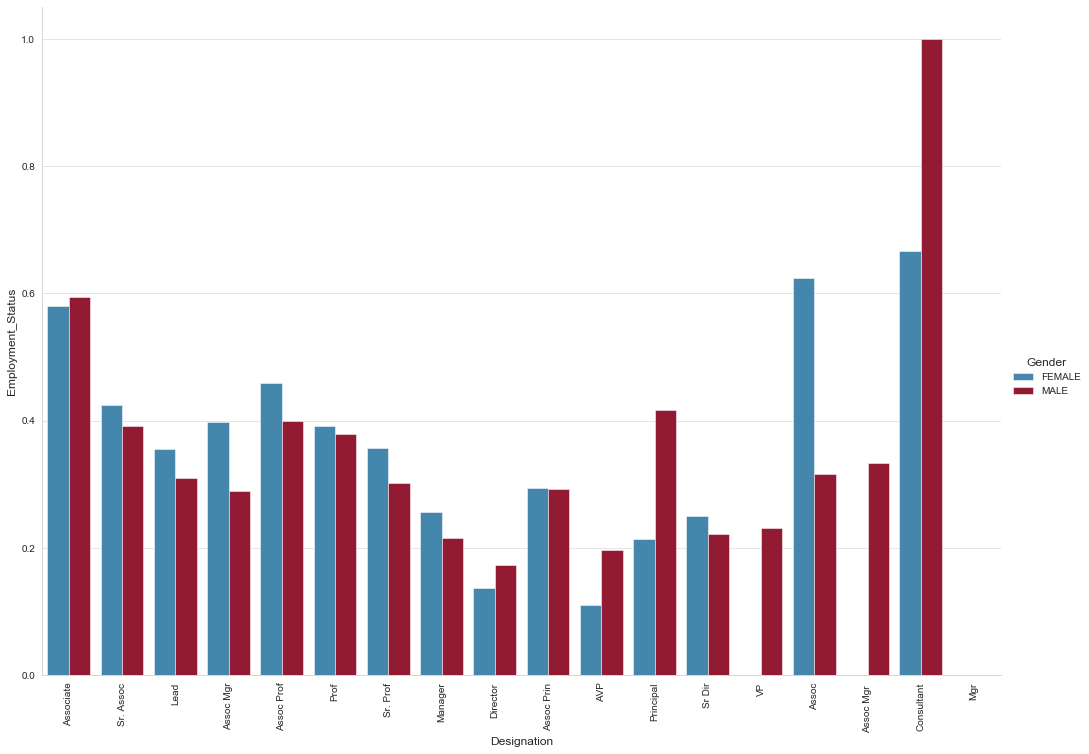

In [508]:
sns.catplot(x="Designation", y="Employment_Status", hue = 'Gender',data = normalized_df,order = normalized_df['Designation'].value_counts().iloc[:18].index, kind="bar",ci=None,height=10, aspect=11.7/8.27);
plt.xticks(rotation=90)
plt.show()

The distribution among genders is more or less the same except, more female associates are leaving and more male consultants are leaving.

# Modelling

Before moving on we will deal with the Gender, Department and Designation columns as they are categorical data.

In [509]:
#department
df = df.drop('Department / BU',axis =1)
dfv = dfv.drop('Department / BU', axis =1)

In [510]:
#gender
ce_one_hot = ce.OneHotEncoder(cols = ['Gender'])
df = ce_one_hot.fit_transform(df)

In [511]:
dfv = ce_one_hot.fit_transform(dfv)

In [512]:
#designation
encoder = ce.BinaryEncoder(cols=['Designation'])
df = encoder.fit_transform(df)

In [513]:
dfv = encoder.fit_transform(dfv)

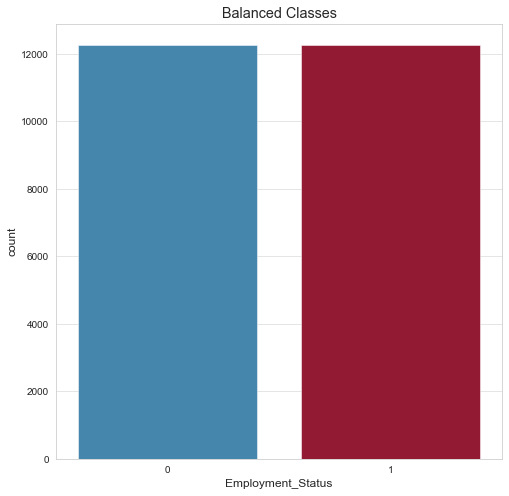

In [514]:
#undersampling again
shuffled_df = df.sample(frac = 1, random_state  = RSEED)
attrited_df = shuffled_df.loc[shuffled_df['Employment_Status']==1]
non_attrited_df = shuffled_df.loc[shuffled_df['Employment_Status']==0].sample(n= 12278, random_state=RSEED)
normalized_df = pd.concat([attrited_df,non_attrited_df])
plt.figure(figsize=(8, 8))
sns.countplot('Employment_Status', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

>We'll build our predictive model now.

In [515]:
x = normalized_df.drop('Employment_Status',axis = 1)
y = normalized_df['Employment_Status']
features = list(x.columns)

In [516]:
x.dtypes

Age                                    float64
Gender_1                                 int64
Gender_2                                 int64
Designation_0                            int64
Designation_1                            int64
Designation_2                            int64
Designation_3                            int64
Designation_4                            int64
Designation_5                            int64
Designation_6                            int64
Job Level                                int64
Time in months with company              int64
Time in months in current role         float64
shDurationHrs                          float64
No of Schedule for Work                float64
Total No of Schedule                   float64
No of Days Present                       int64
No of Days Absent                        int64
Time in months since manager change      int64
KRA 1                                  float64
KRA_3months                            float64
dtype: object

Train Test Split

In [517]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [518]:
dfv_test = dfv.drop('Employment_Status',axis =1)
dfv_validate = dfv['Employment_Status']

In [519]:
dfv_test.shape

(15959, 21)

# Logistic Regression

In [520]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [521]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logisticRegr, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train, y_train)

In [522]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 2.7825594022071245


In [523]:
y_pred = best_model.predict(x_test)

In [524]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6743769343541294


In [525]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2161  906]
 [1093 1979]]


In [526]:
prediction = best_model.predict(dfv_test)

In [527]:
print("Accuracy:",metrics.accuracy_score(dfv_validate, prediction))

Accuracy: 0.692775236543643


In [528]:
cm_final = metrics.confusion_matrix(dfv_validate, prediction)
print(cm_final)

[[10719  4696]
 [  207   337]]


In [529]:
metrics.precision_recall_fscore_support(dfv_validate, prediction)

(array([0.98105437, 0.06695808]),
 array([0.69536166, 0.61948529]),
 array([0.81386432, 0.12085351]),
 array([15415,   544], dtype=int64))

In [530]:
print('Attrition prediction accuracy : {} %'.format(337/544*100))

Attrition prediction accuracy : 61.94852941176471 %


This linear model isn't performing that well.

# XG Boost

In [531]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [532]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [533]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [534]:
#hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
folds = 4
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.2min finished



 Time taken: 0 hours 1 minutes and 25.44 seconds.


In [535]:

print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

 Best normalized gini score for 4-fold search with 5 parameter combinations:
0.7321544071983748

 Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [536]:

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1
                    )


In [537]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=3,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [538]:
y_pred = xgb.predict(x_test)

In [539]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7621762502036162


In [540]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2242  825]
 [ 635 2437]]


In [541]:
prediction = xgb.predict(dfv_test)

In [542]:
print("Accuracy:",metrics.accuracy_score(dfv_validate, prediction))

Accuracy: 0.7051820289491822


In [543]:
cm_final = metrics.confusion_matrix(dfv_validate, prediction)
print(cm_final)

[[10854  4561]
 [  144   400]]


In [544]:
metrics.precision_recall_fscore_support(dfv_validate, prediction)

(array([0.98690671, 0.08062891]),
 array([0.70411936, 0.73529412]),
 array([0.82186802, 0.14532243]),
 array([15415,   544], dtype=int64))

In [545]:
dfv.Employment_Status.value_counts()

0    15415
1      544
Name: Employment_Status, dtype: int64

Looking at the true negatives in the confusion matrix and the value counts in the attrition validation data can see out of the **544** cases of attrition in April 2019, we are able to predict **400** cases *correctly*.

In [546]:
print('Attrition prediction accuracy : {} %'.format(400/544*100))

Attrition prediction accuracy : 73.52941176470588 %


**Further examination of features from the model**

In [547]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.1505 ± 0.0027,Time in months since manager change
0.0184 ± 0.0043,No of Days Absent
0.0123 ± 0.0051,KRA 1
0.0120 ± 0.0070,No of Days Present
0.0090 ± 0.0024,Job Level
0.0084 ± 0.0050,KRA_3months
0.0074 ± 0.0030,shDurationHrs
0.0067 ± 0.0036,Time in months with company
0.0047 ± 0.0026,Age
0.0040 ± 0.0042,Total No of Schedule


This is the importance allotted to the features by the model which gives a rough idea of their usefulness in our predictor.

*Time in months since manager* seems to be significantly important.
Attrition is probably **more** among employees who have been under the same manager for longer periods of time.

The categorical features don't seem to be affecting the model much due to the fact that they're either highly skewed or equally distributed.